# **PNAS2020**


This script is an example file showing how to import atmospheric river data from Github used in the paper: ***Seasonal Prediction of western North America Atmospheric Rivers ***. One should notice that due to the storage limitation of Github and policy of GFDL, all files are saved with a post-process form (i.e., AR). If you are interested in the raw data for detecting ARs (e.g., u, v and q), please contact corresponding author **Kai-Chih Tseng**: kaichiht@princeton.edu


Code instruction:

1.   Please copy this file to your googledrive (or local machine) before using it
2.  ram for analyzing this data can't be less than 25GB



## Step 1: Setup environment

In [1]:
# environment setup
!pip install netcdf4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
!pip install wget
import wget

     |████████████████████████████████| 4.3MB 6.6MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=03e9110b92b4a022a956974ccf0181b9ca3dc300142c12cce01c1c413fd06df9
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## Step 2: retrieve data from Github
after executing the following 2 cells, you should have four variables 


(1) "AR_anomaly_model" (unit=day/day) from SPEAR with dimension
>*   season = Jan, Apr, Jul, Oct
*   ens    = 15 ensemble members
*   initial year  = 1995-2017
*   forecast time = 0-11 months
*   lat           = 20.25N-89.25N (0.5 degree)
*   lon           = 100E-60W   (0.625 degree)

(2) "AR_anomaly_obs" (unit=day/day) from ERA5 with dimension
>*  time  = Jan 1995 - Dec 2017 (monthly)
*   lat           = 20.25N-89.25N (0.5 degree)
*   lon           = 100E-60W   (0.625 degree)

(3) "sst_anomaly_model" (unit=K) from SPEAR with dimension
>*   season = Jan, Apr, Jul, Oct
*   ens    = 15 ensemble members
*   initial year  = 1995-2017
*   forecast time = 0-11 months
*   lat           = 79.75S-79.75N  (0.5 degree)
*   lon           = 0E -2.5W   (0.625 degree)

(4) "sst_anomaly_obs" (unit=K) from ERA5 with dimension
>*  time  = Jan 1995 - Dec 2017  (monthly)
*   lat           = 79.75S-79.75N  (0.5 degree)
*   lon           = 0E -2.5W   (0.625 degree)


In [ ]:
# clear current folder
import glob, os
for f in glob.glob("*.npz"):
    os.remove(f)

if 'AR_anomaly_model' in locals():
    del AR_anomaly_model
if 'AR_anomaly_obs' in locals():
    del AR_anomaly_obs
if 'sst_anomaly_model' in locals():
    del sst_anomaly_model
if 'sst_anomaly_obs' in locals():
    del sst_anomaly_obs


pcs        = np.zeros((1000,16560))
EOF        = np.zeros((1000,139,319))

# downloading data from Github
for i in range(1,5):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_EOF'+str(i)+'.npz')
    EOF[250*(i-1):250*(i-1)+250] = data['EOF']
EOF = np.reshape(EOF,[1000,139*319])

for i in range(1,3):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_pcs'+str(i)+'.npz')
    pcs[500*(i-1):500*(i-1)+500] = data['pcs_ar']

AR_anomaly_model = np.matmul(np.transpose(pcs),EOF)
AR_anomaly_model = np.reshape(AR_anomaly_model,[4,15,23,12,139,319])


url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/obs.npz'
filename        = wget.download(url)
data            = np.load('/content/obs.npz')
pcs_obs_ar      = data['pcs_obs_ar']
EOF             = data['EOF']
EOF             = np.reshape(EOF,[276,139*319])
AR_anomaly_obs  = np.matmul(np.transpose(pcs_obs_ar),EOF)
AR_anomaly_obs  = np.reshape(AR_anomaly_obs,[276,139,319])


https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF2.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF3.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF4.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs2.npz


In [ ]:
del AR_anomaly_obs
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/obs_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/obs_sst.npz')
pcs_obs_sst     = data['pcs_obs_sst']
EOF             = data['EOF'][:,20:340,:]
EOF             = np.reshape(EOF,[20,320*574])
sst_anomaly_obs = np.matmul(np.transpose(pcs_obs_sst),EOF)
sst_anomaly_obs = np.reshape(sst_anomaly_obs,[276,320,574])

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/model_pcs_sst.npz')
pcs_sst         = data['pcs_sst']

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/model_EOF_sst.npz')
EOF             = data['EOF'][:,20:340,:]
EOF             = np.reshape(EOF,[20,320*574])
sst_anomaly_model = np.matmul(np.transpose(pcs_sst),EOF)
sst_anomaly_model = np.reshape(sst_anomaly_model,[4,15,23,12,320,574])

(20, 359, 574)

## Step 3: Data Visualization
The example here shows the ensemble mean of AR frequency for the forecast made in Jan 1995 with target month: Jan 1995. 

([<matplotlib.axis.XTick at 0x7f163b41a240>,
 [Text(0, 0, '$120^oE$'),
  Text(0, 0, '$150^oE$'),
  Text(0, 0, '$180^oE$'),
  Text(0, 0, '$150^oW$'),
  Text(0, 0, '$120^oW$'),
  Text(0, 0, '$90^oW$'),
  Text(0, 0, '$60^oW$')])

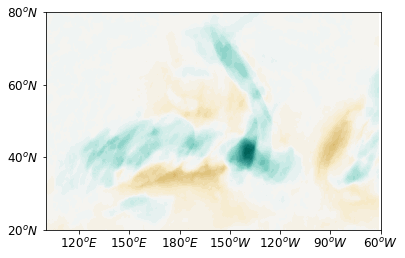

In [ ]:
# visualize the model AR anomaly
clevs   = np.arange(-0.24,0.25,0.01)
y       = np.arange(20,89.75-0.5,0.5)
x       = np.arange(100,300-0.625,0.625)
lat,lon = np.meshgrid(y,x)

plt.figure()
plt.contourf(x,y,AR_anomaly_model[0,:,0,0,:,:].mean(axis=0),clevs,cmap='BrBG')
plt.xlim(100,300)
plt.xticks([120,150,180,210,240,270], [],fontsize=15)
plt.ylim(20,75)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=12)
plt.xticks([120,150,180,210,240,270,300], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$'],fontsize=12)

# visualize the EAR5 AR anomaly    

## Step 4: Plotting Figures 

Previously codes shows how load the (semi-raw) data used in the main text. 
For convience, we also organize the data that has been directly used in the figures. This part of code is for visualization purpose.


[Text(0, 0, '')]

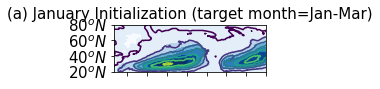

In [5]:
# load file for FIG1
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG1.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG1.npz')
obs_clim        = data['obs_clim']
Jan_clim        = data['Jan_clim']
Apr_clim        = data['Apr_clim']
Jul_clim        = data['Jul_clim']
Oct_clim        = data['Oct_clim']
xx              = data['xx']
yy              = data['yy']


# for map plotting 
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG1.npz'
filename        = wget.download(url)
f               = open("/content/gdrive/My Drive/2019_research/Tensor_flow_turtorial/lat.bin", "r")
costal_lat      = np.fromfile(f, np.float32)

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG1.npz'
filename        = wget.download(url)
f               = open("/content/gdrive/My Drive/2019_research/Tensor_flow_turtorial/lon.bin", "r")
costal_lon      = np.fromfile(f, np.float32)  


fig=plt.figure()
clevs=np.arange(0,0.24,0.04)
ax=plt.subplot(4,2,1)
plt.contourf(xx,yy,Jan_clim,clevs,cmap='Blues',extend='both')
plt.contour(xx,yy,obs_clim,[0,0.04,0.08,0.12,0.16,0.2,0.24,0.28])
plt.xlim(100,330)
plt.xticks([120,150,180,210,240,270,300,330], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$','$30^oW$'],fontsize=15)
plt.ylim(20,80)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.title('(a) January Initialization (target month=Jan-Mar)',fontsize=15)
ax.set_xticklabels([''],fontsize=15)